### Task1.3 - 模型评估 

记录7个模型（逻辑回归、SVM、决策树、随机森林、GBDT、XGBoost和LightGBM）关于accuracy、precision，recall和F1-score、auc值的评分表格，并画出ROC曲线。

[文档地址](https://shimo.im/docs/NTt9uqcuPhETs6w6)

In [1]:
#引入包
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import metrics
import time

In [2]:
data = pd.read_csv('data_all.csv')

data.head()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,reg_preference_for_trad,latest_query_time_month,latest_query_time_weekday,loans_latest_time_month,loans_latest_time_weekday
0,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,2.0,1200.0,1200.0,12.0,18.0,0,4.0,2.0,4.0,3.0
1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,6.0,22800.0,9360.0,4.0,2.0,0,5.0,3.0,5.0,5.0
2,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1.0,4200.0,4200.0,2.0,6.0,0,5.0,5.0,5.0,1.0
3,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,5.0,30000.0,12180.0,2.0,4.0,1,5.0,5.0,5.0,3.0
4,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,2.0,8400.0,8250.0,22.0,120.0,0,4.0,6.0,1.0,6.0


In [3]:
# 拆分训练集和测试集
y = data['status']
X = data.drop(['status'],axis=1)
y.value_counts()
print('The shape of X is: ',X.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3, random_state=2018)
y_train.value_counts()
y_test.value_counts()

0    3561
1    1193
Name: status, dtype: int64

('The shape of X is: ', (4754, 84))


0    2493
1     834
Name: status, dtype: int64

0    1068
1     359
Name: status, dtype: int64

In [4]:
#构建模型
lr_model = LogisticRegression(random_state=2018)
svm_model = SVC(random_state=2018, gamma='auto', probability=True)
dt_model = DecisionTreeClassifier(random_state=2018)
rf_model = RandomForestClassifier(random_state=2018, n_estimators=100)
gbdt_model = GradientBoostingClassifier(random_state=2018, n_estimators=100)
xgb_model = XGBClassifier(random_state=2018, n_estimators=100)
lgbm_model = LGBMClassifier(random_state=2018, n_estimators=100)

models = {'LR':lr_model,
          'SVM':svm_model,
          'CART':dt_model,
         'RF':rf_model,
         'GBDT':gbdt_model,
         'XGB':xgb_model,
         'LightGBM':lgbm_model}

In [12]:
def evaluate(y,y_hat,y_proba):
    acc = metrics.accuracy_score(y,y_hat)
    p = metrics.precision_score(y,y_hat)
    r = metrics.recall_score(y,y_hat)
    f1 = metrics.f1_score(y,y_hat,average='weighted')
    fpr,tpr,thresholds = metrics.roc_curve(y,y_proba[:,1])
    auc = metrics.auc(fpr,tpr)
    #auc = metrics.roc_auc_score(y,y_hat)
    return acc, p, r, f1, fpr, tpr, auc

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=2018, shrinking=True,
  tol=0.001, verbose=False)

Model            SVM
Group          train
Accuracy           1
Precision          1
Recall             1
F1 score           1
AUC                0
Time         12.0349
Name: 0, dtype: object


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=2018,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

Model        LightGBM
Group           train
Accuracy     0.997295
Precision           1
Recall       0.989209
F1 score      0.99729
AUC          0.999998
Time          1.67762
Name: 1, dtype: object


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=2018, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

Model             XGB
Group           train
Accuracy      0.85242
Precision    0.872017
Recall       0.482014
F1 score     0.836302
AUC           0.91836
Time          1.43398
Name: 2, dtype: object


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2018,
            splitter='best')

Model            CART
Group           train
Accuracy            1
Precision           1
Recall              1
F1 score            1
AUC                 1
Time         0.180933
Name: 3, dtype: object


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

Model           RF
Group        train
Accuracy         1
Precision        1
Recall           1
F1 score         1
AUC              1
Time         2.313
Name: 4, dtype: object


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=2018,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Model            GBDT
Group           train
Accuracy     0.862338
Precision    0.883673
Recall       0.519185
F1 score     0.848897
AUC          0.920746
Time          1.27655
Name: 5, dtype: object


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=2018, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Model              LR
Group           train
Accuracy     0.749324
Precision           0
Recall              0
F1 score     0.641946
AUC          0.576167
Time         0.140492
Name: 6, dtype: object


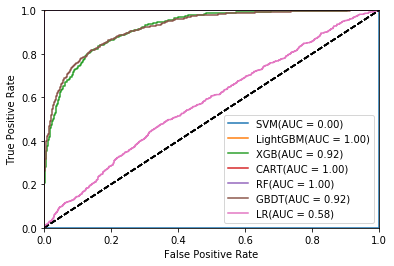

In [20]:
df_result = pd.DataFrame(columns=('Model', 'Group', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC', 'Time'))
row = 0
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)
    end = time.time()

    acc,p,r,f1,fpr,tpr,auc = evaluate(y_train,y_train_pred,y_train_proba)
    plot_roc_curve(fpr,tpr,label=name+'(AUC = %.2f)' %(auc))

    df_result.loc[row] = [name, 'train', acc, p, r, f1, auc, end-start]
    print(df_result.loc[row])
    row += 1
    
plt.show()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=2018, shrinking=True,
  tol=0.001, verbose=False)

Model             SVM
Group            test
Accuracy     0.748423
Precision           0
Recall              0
F1 score     0.640734
AUC               0.5
Time           10.482
Name: 7, dtype: object


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=2018,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

Model        LightGBM
Group            test
Accuracy     0.770147
Precision    0.570136
Recall       0.350975
F1 score     0.749777
AUC          0.757402
Time          1.69075
Name: 8, dtype: object


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=2018, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

Model             XGB
Group            test
Accuracy     0.785564
Precision    0.630542
Recall       0.356546
F1 score       0.7631
AUC          0.771363
Time          1.25207
Name: 9, dtype: object


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2018,
            splitter='best')

Model            CART
Group            test
Accuracy     0.684653
Precision    0.382429
Recall       0.412256
F1 score     0.688477
AUC          0.594237
Time         0.175074
Name: 10, dtype: object


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

Model              RF
Group            test
Accuracy      0.78206
Precision    0.681818
Recall       0.250696
F1 score     0.742149
AUC          0.749407
Time          1.63937
Name: 11, dtype: object


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=2018,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Model            GBDT
Group            test
Accuracy     0.780659
Precision     0.61165
Recall       0.350975
F1 score     0.758291
AUC          0.763828
Time          1.31337
Name: 12, dtype: object


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=2018, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Model              LR
Group            test
Accuracy     0.748423
Precision           0
Recall              0
F1 score     0.640734
AUC           0.56746
Time          0.11393
Name: 13, dtype: object


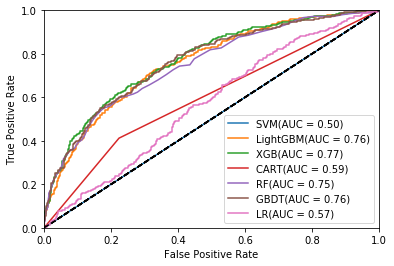

In [21]:
for name,model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)
    end = time.time()
    acc,p,r,f1,fpr,tpr,auc = evaluate(y_test,y_test_pred,y_test_proba)
    
    plot_roc_curve(fpr,tpr,label=name+'(AUC = %.2f)' %(auc))

    df_result.loc[row] = [name, 'test', acc, p, r, f1, auc, end-start]
    print(df_result.loc[row])
    row += 1
plt.show()

In [22]:
df_result

,Model,Group,Accuracy,Precision,Recall,F1 score,AUC,Time
0,SVM,train,1.000000,1.000000,1.000000,1.000000,0.000000,12.034895
1,LightGBM,train,0.997295,1.000000,0.989209,0.997290,0.999998,1.677618
2,XGB,train,0.852420,0.872017,0.482014,0.836302,0.918360,1.433976
3,CART,train,1.000000,1.000000,1.000000,1.000000,1.000000,0.180933
4,RF,train,1.000000,1.000000,1.000000,1.000000,1.000000,2.313004
5,GBDT,train,0.862338,0.883673,0.519185,0.848897,0.920746,1.276546
6,LR,train,0.749324,0.000000,0.000000,0.641946,0.576167,0.140492
7,SVM,test,0.748423,0.000000,0.000000,0.640734,0.500000,10.482027
8,LightGBM,test,0.770147,0.570136,0.350975,0.749777,0.757402,1.690752
9,XGB,test,0.785564,0.630542,0.356546,0.763100,0.771363,1.252075
